In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df1=pd.read_excel('Tags1.xlsx',sheet_name='G1')
df2=pd.read_excel('Tags1.xlsx',sheet_name='G2')
df3=pd.read_excel('Tags1.xlsx',sheet_name='G3')
df4=pd.read_excel('Tags1.xlsx',sheet_name='G4')
df5=pd.read_excel('Tags1.xlsx',sheet_name='G5')
df6=pd.read_excel('Tags1.xlsx',sheet_name='G6')
df7=pd.read_excel('Tags1.xlsx',sheet_name='G7')
df8=pd.read_excel('Tags1.xlsx',sheet_name='G8')
df9=pd.read_excel('Tags1.xlsx',sheet_name='G9')
df10=pd.read_excel('Tags1.xlsx',sheet_name='G10')

df=pd.read_excel('MIX_FAILURE.xlsx')
df

,Start Time,End Time,Gasifier No.,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
0,2021-05-04 09:36:00,2021-05-04 13:00:00,G1,0.141667,0,0.000000,0,0,0.000000,0.00000,0.000000,0.000000,0.000000
1,2021-12-14 21:49:00,2022-04-13 20:08:38,G1,119.930301,0,0.000000,0,0,0.000000,0.00000,0.000000,0.000000,0.000000
2,2023-03-01 04:16:06,2023-03-01 13:22:20,G3,0.000000,0,0.379329,0,0,0.000000,0.00000,0.000000,0.000000,0.000000
3,2022-10-26 12:44:53,2022-10-30 09:28:03,G6,0.000000,0,0.000000,0,0,3.863310,0.00000,0.000000,0.000000,0.000000
4,2023-01-10 23:39:58,2023-04-04 23:45:57,G6,0.000000,0,0.000000,0,0,84.004155,0.00000,0.000000,0.000000,0.000000
5,2021-09-09 05:35:00,2021-09-09 08:26:00,G7,0.000000,0,0.000000,0,0,0.000000,0.11875,0.000000,0.000000,0.000000
6,2022-12-16 04:43:53,2023-02-22 23:43:38,G8,0.000000,0,0.000000,0,0,0.000000,0.00000,68.791493,0.000000,0.000000
7,2020-12-23 22:07:00,2021-02-22 09:57:00,G9,0.000000,0,0.000000,0,0,0.000000,0.00000,0.000000,60.493056,0.000000
8,2021-03-22 07:44:00,2021-05-24 16:17:58,G9,0.000000,0,0.000000,0,0,0.000000,0.00000,0.000000,63.356921,0.000000
9,2020-12-09 21:57:00,2021-01-26 00:32:00,G10,0.000000,0,0.000000,0,0,0.000000,0.00000,0.000000,0.000000,47.107639


In [ ]:
from datetime import datetime, timedelta

def sub_time(input_datetime):

    result_datetime = input_datetime - timedelta(minutes=29)

    return result_datetime


def add_time(input_datetime):

    result_datetime = input_datetime + timedelta(minutes=29)

    return result_datetime

In [ ]:
i=4
start=df['Start Time'].tolist()
print(start[i])
end=df['End Time'].tolist()
print(end[i])


start_date = sub_time(start[i])
end_date = add_time(end[i])
X = df6[(df6['DATE TIME'] >= start_date) & (df6['DATE TIME'] <= end_date)]
X.head()

2023-01-10 23:39:58
2023-04-04 23:45:57


,DATE TIME,H210FI233018A,H210FI233035A,H210FI234004,H210FI234333,H210PDI234046B,H210PDI234058B,H210PDI234060B,H210PDI234252B,H210TXI233075A,H210TXI233075B,H210TXI234019,H210TXI234020
35507,2023-01-10 23:30:00,30.3163,29.8486,10468.6,19651.3,3.36967,3.54120,1.66689,2.16915,50.9232,50.2569,171.211,187.420
35508,2023-01-11 00:00:00,37.5554,37.9496,37349.0,38215.6,5.76878,6.79563,6.57843,6.37178,51.1026,50.3848,178.962,197.747
35509,2023-01-11 00:30:00,37.5318,37.9972,38293.0,38265.2,5.64800,6.71195,6.88344,6.58737,51.0745,50.3818,200.852,207.745
35510,2023-01-11 01:00:00,37.5615,38.0131,38820.7,38810.5,5.54709,6.55347,6.25513,6.09162,53.1360,52.1865,205.377,218.609
35511,2023-01-11 01:30:00,37.5182,37.9917,38952.8,38890.3,5.83660,6.95950,6.00226,5.90824,63.0924,61.4037,201.555,217.238


In [ ]:
data_columns = X.iloc[:,1:]

data_columns = data_columns.fillna(data_columns.mean())

dc_standardized = StandardScaler().fit_transform(data_columns)

n_components = 3
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(dc_standardized)

columns_pca = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=principal_components, columns=columns_pca)
df_pca

,PC1,PC2,PC3
0,30.542288,10.331836,7.044150
1,20.422486,12.687184,7.301350
2,20.199601,13.083747,6.827557
3,20.228237,12.136431,6.855231
4,19.148159,8.186941,5.251739
...,...,...,...
4029,7.762032,-1.663699,-2.157331
4030,10.215889,-2.395698,-2.239314
4031,10.162431,-2.864766,-2.063829
4032,19.584810,-5.506341,-2.824629


In [ ]:
import numpy as np

data_columns = X.iloc[:,1:]

data_columns = data_columns.fillna(data_columns.mean())

dc_standardized = StandardScaler().fit_transform(data_columns)

n_components = 3
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(dc_standardized)

# Columns for the PCA dataframe
columns_pca = [f'PC{i+1}' for i in range(n_components)]

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=columns_pca)

# Get loadings for PC1 and PC2
loadings_pc1 = pca.components_[0]
loadings_pc2 = pca.components_[1]
loadings_pc3 = pca.components_[2]

loadings_df = pd.DataFrame({
    'Variable': data_columns.columns,
    'PC1 Loading': loadings_pc1,
    'PC2 Loading': loadings_pc2,
    'PC3 Loading': loadings_pc3
})

print(loadings_df)

# Normalize the loadings by dividing by the sum of absolute values
loadings_pc1_normalized = loadings_pc1 / np.sum(np.abs(loadings_pc1))
loadings_pc2_normalized = loadings_pc2 / np.sum(np.abs(loadings_pc2))
loadings_pc3_normalized = loadings_pc3 / np.sum(np.abs(loadings_pc3))

# Create a DataFrame to display the normalized loadings for PC1 and PC2
normalized_loadings_df = pd.DataFrame({
    'Variable': data_columns.columns,
    'PC1 Norm Load': loadings_pc1_normalized,
    'PC2 Norm Load': loadings_pc2_normalized,
    'PC3 Norm Load': loadings_pc3_normalized
})

print(normalized_loadings_df)


                    Variable  PC1 Loading  PC2 Loading  PC3 Loading
0   H210FI233018A               -0.343971     0.099513    -0.037665
1   H210FI233035A               -0.345076     0.093024    -0.032415
2   H210FI234004                -0.349150     0.093319    -0.034683
3   H210FI234333                -0.349226     0.099331    -0.031035
4   H210PDI234046B              -0.309842     0.064754     0.069231
5   H210PDI234058B              -0.340298     0.073916     0.046932
6   H210PDI234060B              -0.353457     0.070340     0.029446
7   H210PDI234252B              -0.342775     0.062321     0.049333
8   H210TXI233075A              -0.115679    -0.675007    -0.330343
9   H210TXI233075B              -0.210254    -0.577354    -0.222037
10  H210TXI234019                0.026138     0.330967    -0.649208
11  H210TXI234020               -0.078987    -0.214171     0.636530
                    Variable  PC1 Norm Load  PC2 Norm Load  PC3 Norm Load
0   H210FI233018A                 -0.10868

['H210PDI234060B          ', 'H210FI234333            ']
['H210TXI233075A          ', 'H210TXI233075B          ']
['H210TXI234019           ', 'H210TXI234020           ']


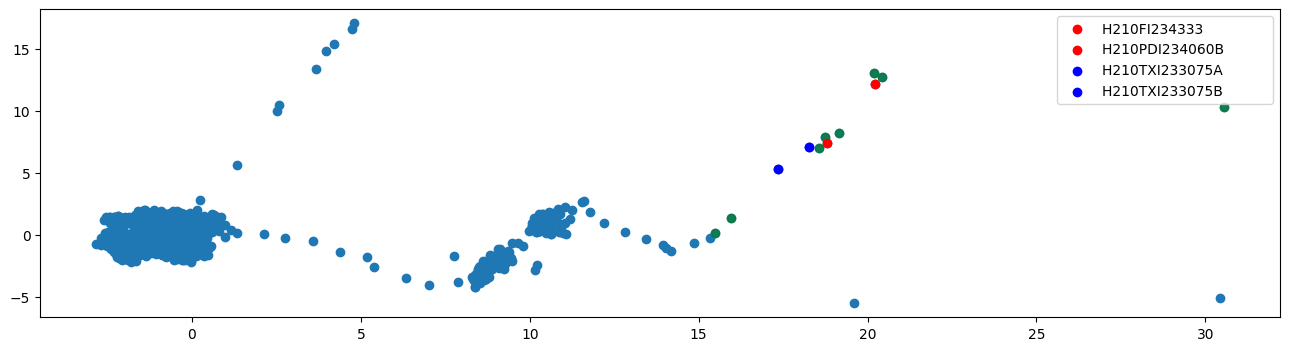

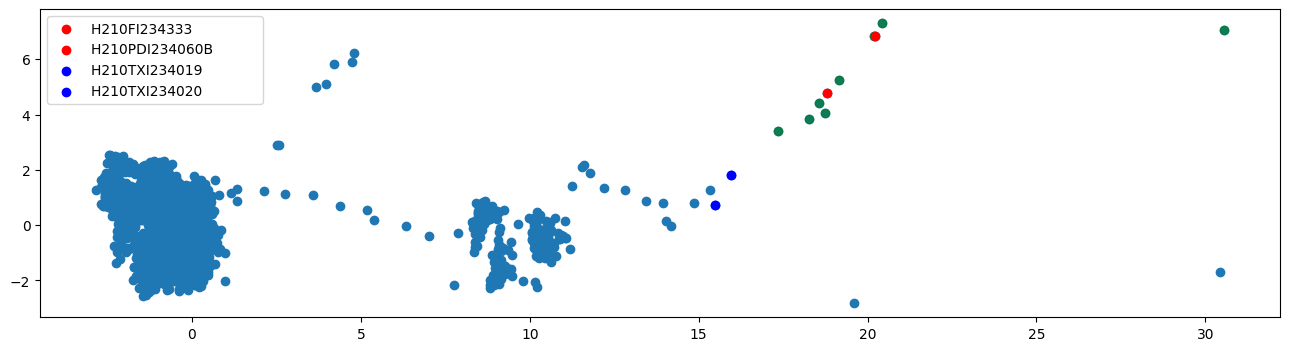

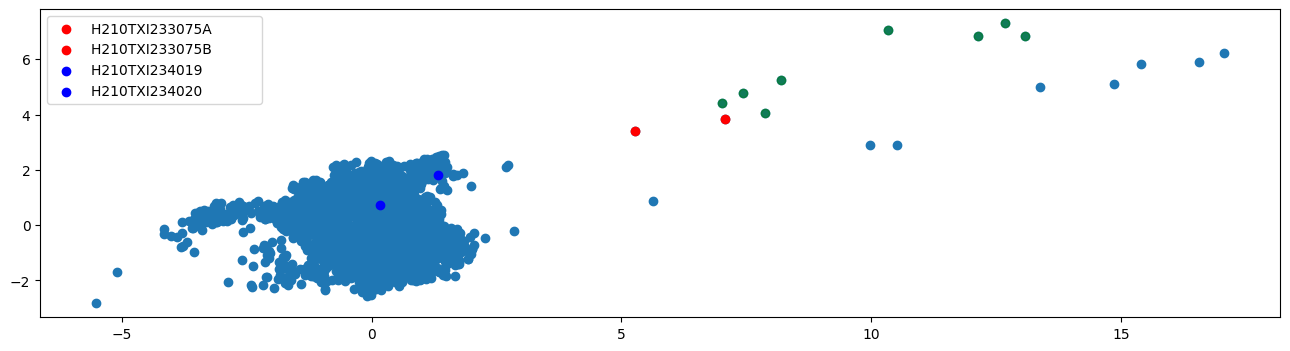

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.scatter(df_pca['PC1'], df_pca['PC2'])

# Identify 2 variables with highest absolute loadings for PC1 and PC2
top_variables_pc1 = normalized_loadings_df.sort_values(by='PC1 Norm Load', key=lambda x: abs(x), ascending=False)['Variable'].head(2).tolist()
top_variables_pc2 = normalized_loadings_df.sort_values(by='PC2 Norm Load', key=lambda x: abs(x), ascending=False)['Variable'].head(2).tolist()
top_variables_pc3 = normalized_loadings_df.sort_values(by='PC3 Norm Load', key=lambda x: abs(x), ascending=False)['Variable'].head(2).tolist()

print(top_variables_pc1)
print(top_variables_pc2)
print(top_variables_pc3)

# Highlight points associated with top variables in PC1 and PC2
for variable, row in zip(data_columns.columns, df_pca.iterrows()):
    index, values = row
    if variable in top_variables_pc1:
        plt.scatter(values['PC1'], values['PC2'], color='red', label=variable)
    elif variable in top_variables_pc2:
        plt.scatter(values['PC1'], values['PC2'], color='blue', label=variable)
    else:
        plt.scatter(values['PC1'], values['PC2'], color='green', alpha=0.5)

# Add legend
plt.legend()

# Show the plot
plt.show()



import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.scatter(df_pca['PC1'], df_pca['PC3'])

# Identify 2 variables with highest absolute loadings for PC1 and PC2
top_variables_pc1 = normalized_loadings_df.sort_values(by='PC1 Norm Load', key=lambda x: abs(x), ascending=False)['Variable'].head(2).tolist()
top_variables_pc2 = normalized_loadings_df.sort_values(by='PC2 Norm Load', key=lambda x: abs(x), ascending=False)['Variable'].head(2).tolist()
top_variables_pc3 = normalized_loadings_df.sort_values(by='PC3 Norm Load', key=lambda x: abs(x), ascending=False)['Variable'].head(2).tolist()

# Highlight points associated with top variables in PC1 and PC2
for variable, row in zip(data_columns.columns, df_pca.iterrows()):
    index, values = row
    if variable in top_variables_pc1:
        plt.scatter(values['PC1'], values['PC3'], color='red', label=variable)
    elif variable in top_variables_pc3:
        plt.scatter(values['PC1'], values['PC3'], color='blue', label=variable)
    else:
        plt.scatter(values['PC1'], values['PC3'], color='green', alpha=0.5)

# Add legend
plt.legend()

# Show the plot
plt.show()





import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.scatter(df_pca['PC2'], df_pca['PC3'])

# Identify 2 variables with highest absolute loadings for PC1 and PC2
top_variables_pc1 = normalized_loadings_df.sort_values(by='PC1 Norm Load', key=lambda x: abs(x), ascending=False)['Variable'].head(2).tolist()
top_variables_pc2 = normalized_loadings_df.sort_values(by='PC2 Norm Load', key=lambda x: abs(x), ascending=False)['Variable'].head(2).tolist()
top_variables_pc3 = normalized_loadings_df.sort_values(by='PC3 Norm Load', key=lambda x: abs(x), ascending=False)['Variable'].head(2).tolist()


# Highlight points associated with top variables in PC1 and PC2
for variable, row in zip(data_columns.columns, df_pca.iterrows()):
    index, values = row
    if variable in top_variables_pc2:
        plt.scatter(values['PC2'], values['PC3'], color='red', label=variable)
    elif variable in top_variables_pc3:
        plt.scatter(values['PC2'], values['PC3'], color='blue', label=variable)
    else:
        plt.scatter(values['PC2'], values['PC3'], color='green', alpha=0.5)

# Add legend
plt.legend()

# Show the plot
plt.show()

['H210TXI233075A          ', 'H210PDI234060B          ', 'H210TXI234019           ', 'H210FI234333            ', 'H210TXI234020           ', 'H210TXI233075B          ']


<ipython-input-72-4ee07efd61fa>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DATE TIME'] = pd.to_datetime(X['DATE TIME'])


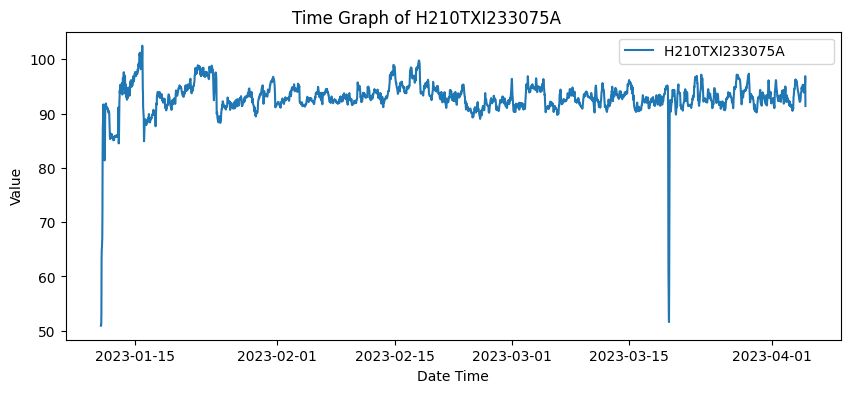

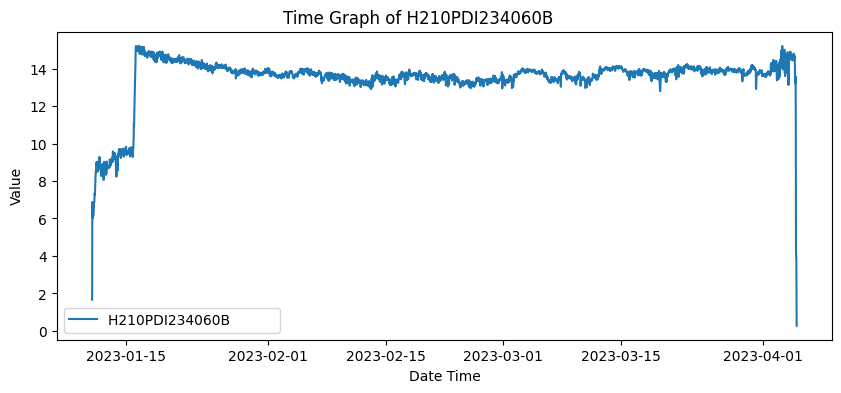

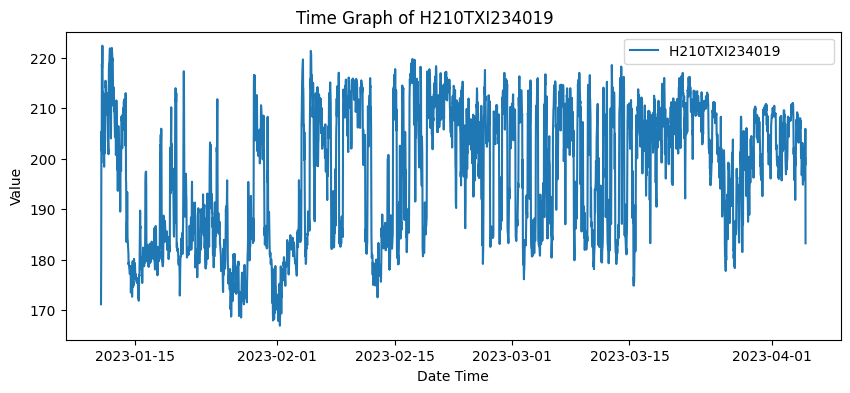

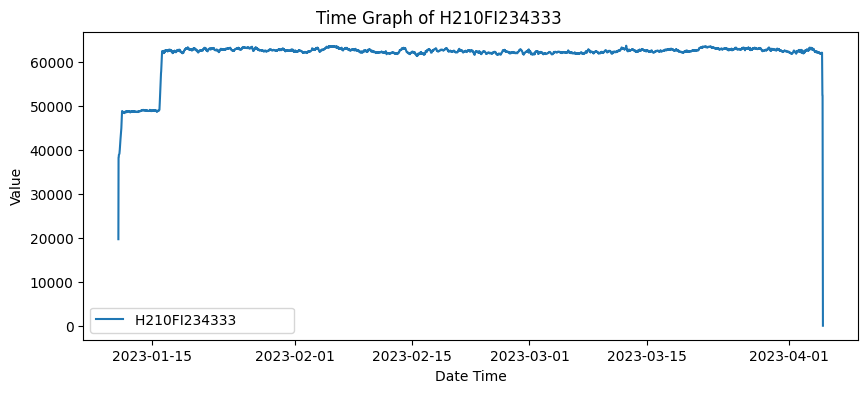

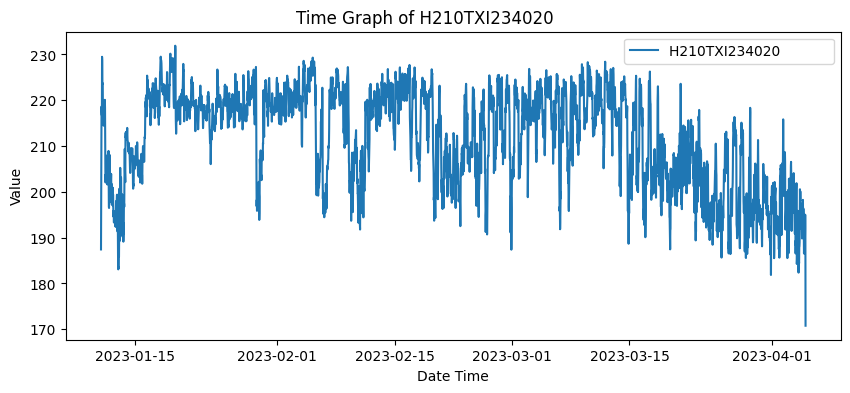

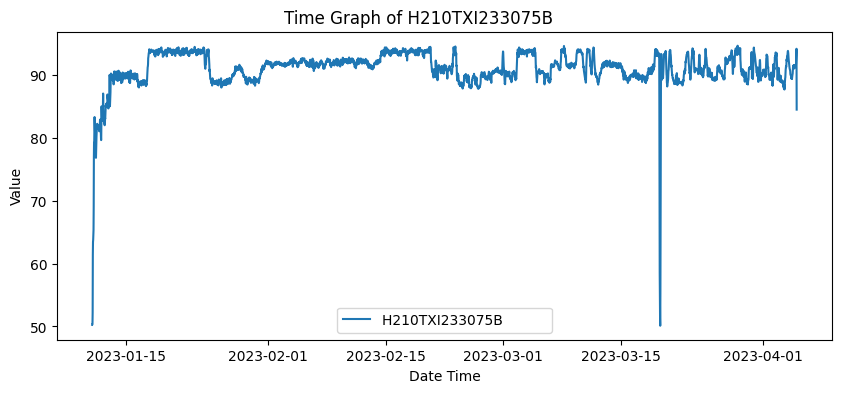

In [ ]:
# Combining the three lists into one list
all_variables = top_variables_pc1 + top_variables_pc2 + top_variables_pc3

# Creating a set to store unique values
unique_variables_set = set(all_variables)

# Convering the set back to a list
unique_variables_list = list(unique_variables_set)

print(unique_variables_list)


import matplotlib.pyplot as plt

X['DATE TIME'] = pd.to_datetime(X['DATE TIME'])

# Plotting time graphs for each column
for column_name in unique_variables_list:
    if column_name != 'DATE TIME':  # Skip 'DATE TIME' column for individual plotting
        plt.figure(figsize=(10, 4))
        plt.plot(X['DATE TIME'], X[column_name], label=column_name)


        plt.xlabel('Date Time')
        plt.ylabel('Value')
        plt.title(f'Time Graph of {column_name}')

        plt.legend()

        plt.show()


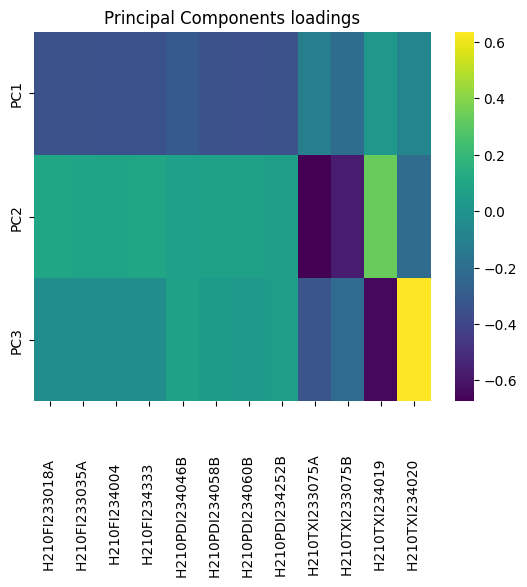

In [ ]:
import seaborn as sns

sns.heatmap(pca.components_, cmap='viridis', yticklabels=columns_pca, xticklabels=data_columns.columns)
plt.title('Principal Components loadings')
plt.show()

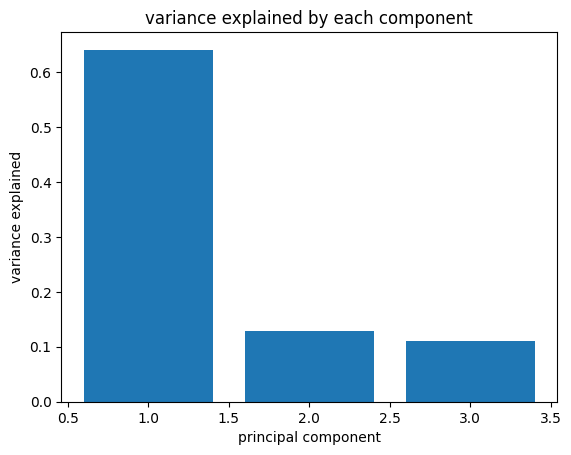

In [ ]:
plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
plt.title('variance explained by each component')
plt.xlabel('principal component')
plt.ylabel('variance explained')
plt.show()